## Observations and Insights 

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
combinded_data = pd.DataFrame(combined_data)

# Display the data table for preview
combined_data.head()



Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [36]:
# Checking the number of mice.
combined_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [37]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
duplicates.value_counts()

False    1883
True       10
dtype: int64

In [38]:
# Optional: Get all the data for the duplicate mouse ID. 



In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])


In [40]:
# Checking the number of mice in the clean DataFrame.
cleaned_data.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
trimmed_data = cleaned_data.loc[:, ["Drug Regimen", "Tumor Volume (mm3)"]]
grouped_data = trimmed_data.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
average = round(grouped_data.mean(), 2)
middle = round(grouped_data.median(), 2)
standard_dev = round(grouped_data.std(), 2)
standard_error = round(grouped_data.sem(), 2)
# Assemble the resulting series into a single summary dataframe.
summary_Tumor_Volume = pd.DataFrame({"Average": average["Tumor Volume (mm3)"], "Median": middle["Tumor Volume (mm3)"], "Standard Deviation": standard_dev["Tumor Volume (mm3)"], "SEM": standard_error["Tumor Volume (mm3)"]})
summary_Tumor_Volume.head()


Average  Median  Standard Deviation   SEM
Drug Regimen                                           
Capomulin       40.68   41.56                4.99  0.33
Ceftamin        52.59   51.78                6.27  0.47
Infubinol       52.88   51.82                6.57  0.49
Ketapril        55.24   53.70                8.28  0.60
Naftisol        54.33   52.51                8.13  0.60

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

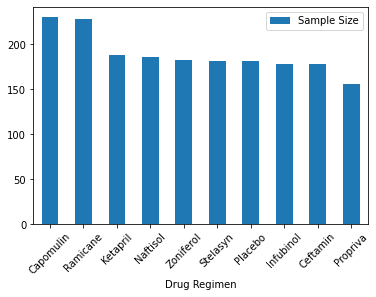

In [67]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
sample_size = cleaned_data["Drug Regimen"].value_counts()
sample_size = pd.DataFrame(sample_size)
sample_size = sample_size.reset_index(0)
sample_size = sample_size.rename(columns={"index":"Drug Regimen", "Drug Regimen":"Sample Size"})
sample_size
#x_values = np.arange(0, sample_size["Drug Regimen"].count(), 1)
sample_size.plot.bar(x="Drug Regimen", y="Sample Size", rot=45)

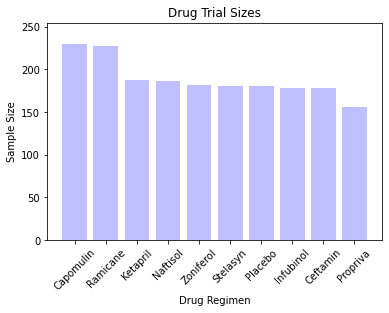

In [72]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_values = np.arange(0, sample_size["Sample Size"].count(), 1)
Drug_Regimen= sample_size["Drug Regimen"]
plt.xticks(x_values, Drug_Regimen, rotation=45)
plt.bar(x_values, sample_size["Sample Size"], color="blue", alpha=.25)
plt.ylim(0, max(sample_size["Sample Size"])+25)
plt.ylabel("Sample Size")
plt.xlabel("Drug Regimen")
plt.title("Drug Trial Sizes")
plt.show()

<AxesSubplot:title={'center':'Gender Proportion'}, ylabel='Sex'>

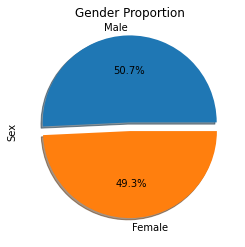

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_proportion = cleaned_data["Sex"].value_counts()
gender_proportion.plot.pie(title="Gender Proportion", explode=(0.1, 0), autopct="%1.1f%%", shadow=True)

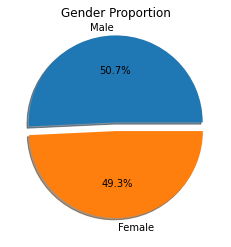

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_proportion, labels=["Male", "Female"], explode=(0.1,0), autopct="%1.1f%%", shadow=True)
plt.title("Gender Proportion")
plt.show()

## Quartiles, Outliers and Boxplots

In [110]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

regimens = cleaned_data.loc[(cleaned_data["Drug Regimen"]=='Capomulin') | (cleaned_data["Drug Regimen"]=='Ramicane') | (cleaned_data["Drug Regimen"]=='Infubinol') | (cleaned_data["Drug Regimen"]=='Ceftamin'), ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
regimens = regimens.sort_values("Timepoint").groupby("Mouse ID").tail(1)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
regimens.sort_values("Tumor Volume (mm3)")

Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
9        k403     Ramicane         45           22.050126
19       s185    Capomulin         45           23.343598
39       m601    Capomulin         45           28.430964
29       x401    Capomulin         45           28.484033
49       g791     Ramicane         45           29.128472
...       ...          ...        ...                 ...
1112     l471     Ceftamin         45           67.748662
463      a203    Infubinol         45           67.973419
1845     y769     Ceftamin         45           68.594745
1033     k210     Ceftamin         45           68.923185
637      c139    Infubinol         45           72.226731

[100 rows x 4 columns]

In [111]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
t_volume = []
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
blah = regimens["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
IQR = upperq - lowerq
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)
print(lowerq, upperq, lower_bound, upper_bound)

37.1877438025 59.930261755 3.0739668737500097 94.04403868374999


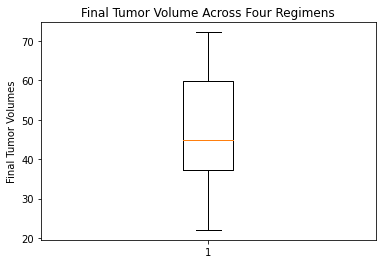

In [108]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Across Four Regimens')
ax1.set_ylabel('Final Tumor Volumes')
ax1.boxplot(regimens["Tumor Volume (mm3)"])
plt.show()

## Line and Scatter Plots

In [50]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [51]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [52]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
